In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
macro = pd.read_csv("./macro.csv")
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690,6221,527,0.41,993,NaN,NaN,63.03,22825,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690,6221,527,0.41,993,NaN,NaN,63.03,22825,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690,6221,527,0.41,993,NaN,NaN,63.03,22825,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690,6221,527,0.41,993,NaN,NaN,63.03,22825,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690,6221,527,0.41,993,NaN,NaN,63.03,22825,NaN


In [2]:
train = pd.read_csv("./train.csv/train.csv")
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27,4,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19,3,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29,2,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50,9,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77,4,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


/usr/local/opt/pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


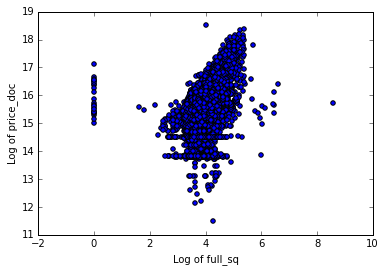

In [3]:
plt.scatter(np.log(train.full_sq),np.log(train.price_doc))
plt.xlabel("Log of full_sq")
plt.ylabel("Log of price_doc")
plt.show()

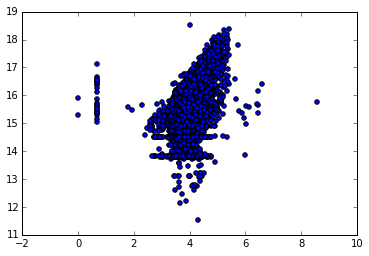

In [4]:
plt.scatter(np.log1p(train.full_sq),np.log(train.price_doc))
plt.show()

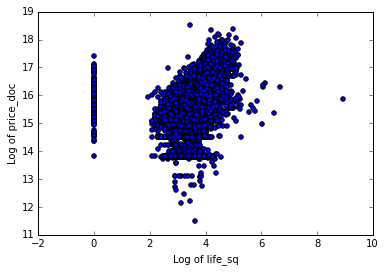

In [5]:
plt.scatter(np.log(train.life_sq),np.log(train.price_doc))
plt.xlabel("Log of life_sq")
plt.ylabel("Log of price_doc")
plt.show()

In [6]:
test = pd.read_csv("./test.csv/test.csv")
id_test = test.id

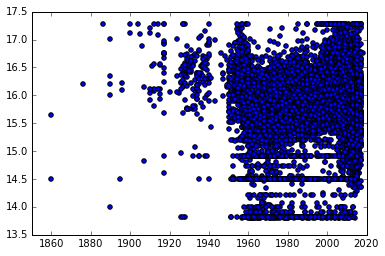

In [10]:
plt.scatter(train.build_year,np.log1p(train.price_doc))
plt.xlim(1850,2020)
plt.show()

/usr/local/opt/pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


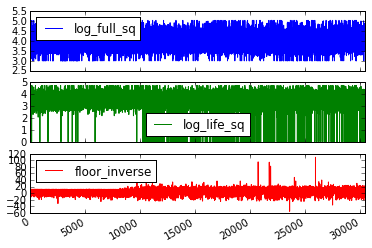

In [16]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import ensemble

train = train.fillna(train.mean(), inplace=True)
test = test.fillna(test.mean(), inplace=True)


def clean_data(data,col):
    ulimit = np.percentile(data[col].values, 99.5)
    llimit = np.percentile(data[col].values, 0.5)
    data[col].ix[data[col]>ulimit] = ulimit
    data[col].ix[data[col]<llimit] = llimit
    return data[col]

train["price_doc"]= clean_data(train,"price_doc")
train["full_sq"] = clean_data(train,"full_sq")
train["life_sq"] = clean_data(train,"life_sq")

test["full_sq"] = clean_data(test,"full_sq")
test["life_sq"]=clean_data(test,"life_sq")
#train["build_year"] = clean_data(train,"build_year")

#train["build_year"].plot()

#ulimit = np.percentile(train.price_doc.values, 99.5)
#llimit = np.percentile(train.price_doc.values, 0.5)

#for c in train.columns:
#    ulimit = np.percentile(train[c].values,99.5)
#    llimit = np.percentile(train[c].values,0.5)
#    train[c].ix[train[c]>ulimit] = ulimit
#    train[c].ix[train[c]<llimit] = llimit

#for c in test.columns:
#    ulimit = np.percentile(test[c].values,99.5)
#    llimit = np.percentile(test[c].values,0.5)
#    test[c].ix[test[c]>ulimit] = ulimit
#    test[c].ix[test[c]<llimit] = llimit

id_test = test.id
# Any results you write to the current directory are saved as output.
y_train = pd.DataFrame(np.log(train["price_doc"]))

x_train = pd.DataFrame({"log_full_sq":np.log(train.full_sq),"log_life_sq":np.log(train.life_sq)})
x_test = pd.DataFrame({"log_full_sq":np.log(test.full_sq),"log_life_sq":np.log(test.life_sq)})


#x_train["year_old"]=np.max(2020-train["build_year"],0)
#x_test["year_old"]=np.max(2020-test["build_year"],0)

#x_train["year_old"] = np.min(2021,x_train["year_old"])
#x_test["year_old"] = np.min(2021,x_test["year_old"])



x_train["floor_inverse"]=train["max_floor"]-train["floor"]
x_test["floor_inverse"]=test["max_floor"]-test["floor"]


#for c in x_train.columns:
#    ss = preprocessing.StandardScaler()
#    ss.fit(x_train[c])


for c in x_train.columns:
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values)) 
        x_train[c] = lbl.transform(list(x_train[c].values))
        #x_train.drop(c,axis=1,inplace=True)
        
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))
        #x_test.drop(c,axis=1,inplace=True) 

x_train.plot(subplots=True)

model = ensemble.GradientBoostingRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
output = pd.DataFrame({'id': id_test, 'price_doc':np.exp(y_predict)})
output.head()

output.to_csv('GBRSub3.csv', index=False)

/usr/local/opt/pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


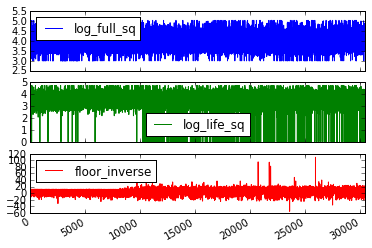

In [18]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import ensemble

train = train.fillna(train.mean(), inplace=True)
test = test.fillna(test.mean(), inplace=True)


def clean_data(data,col):
    ulimit = np.percentile(data[col].values, 99.5)
    llimit = np.percentile(data[col].values, 0.5)
    data[col].ix[data[col]>ulimit] = ulimit
    data[col].ix[data[col]<llimit] = llimit
    return data[col]

train["price_doc"]= clean_data(train,"price_doc")
train["full_sq"] = clean_data(train,"full_sq")
train["life_sq"] = clean_data(train,"life_sq")

test["full_sq"] = clean_data(test,"full_sq")
test["life_sq"]=clean_data(test,"life_sq")
#train["build_year"] = clean_data(train,"build_year")

#train["build_year"].plot()

#ulimit = np.percentile(train.price_doc.values, 99.5)
#llimit = np.percentile(train.price_doc.values, 0.5)

#for c in train.columns:
#    ulimit = np.percentile(train[c].values,99.5)
#    llimit = np.percentile(train[c].values,0.5)
#    train[c].ix[train[c]>ulimit] = ulimit
#    train[c].ix[train[c]<llimit] = llimit

#for c in test.columns:
#    ulimit = np.percentile(test[c].values,99.5)
#    llimit = np.percentile(test[c].values,0.5)
#    test[c].ix[test[c]>ulimit] = ulimit
#    test[c].ix[test[c]<llimit] = llimit

id_test = test.id
# Any results you write to the current directory are saved as output.
y_train = pd.DataFrame(np.log(train["price_doc"]))

x_train = pd.DataFrame({"log_full_sq":np.log(train.full_sq),"log_life_sq":np.log(train.life_sq)})
x_test = pd.DataFrame({"log_full_sq":np.log(test.full_sq),"log_life_sq":np.log(test.life_sq)})


#x_train["year_old"]=np.max(2020-train["build_year"],0)
#x_test["year_old"]=np.max(2020-test["build_year"],0)

#x_train["year_old"] = np.min(2021,x_train["year_old"])
#x_test["year_old"] = np.min(2021,x_test["year_old"])



x_train["floor_inverse"]=train["max_floor"]-train["floor"]
x_test["floor_inverse"]=test["max_floor"]-test["floor"]


#for c in x_train.columns:
#    ss = preprocessing.StandardScaler()
#    ss.fit(x_train[c])


for c in x_train.columns:
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values)) 
        x_train[c] = lbl.transform(list(x_train[c].values))
        #x_train.drop(c,axis=1,inplace=True)
        
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))
        #x_test.drop(c,axis=1,inplace=True) 

x_train.plot(subplots=True)

model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
output = pd.DataFrame({'id': id_test, 'price_doc':np.exp(y_predict)})
output.head()

output.to_csv('LGRSub3.csv', index=False)

In [ ]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import ensemble

train = train.fillna(train.mean(), inplace=True)
test = test.fillna(test.mean(), inplace=True)

train = train.dropna()
test = test.dropna()

id_test = test.id
train.sample(3)
# Any results you write to the current directory are saved as output.
y_train = pd.DataFrame(np.log(train["price_doc"]))

x_train = pd.DataFrame({"log_full_sq":np.log(train.full_sq),"log_life_sq":np.log(train.life_sq)})
x_test = pd.DataFrame({"log_full_sq":np.log(test.full_sq),"log_life_sq":np.log(test.life_sq)})


#x_train["year_old"]=train["build_year"]
#x_test["year_old"]=test["build_year"]



x_train["floor_inverse"]=train["max_floor"]-train["floor"]
x_test["floor_inverse"]=test["max_floor"]-test["floor"]


for c in x_train.columns:
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values)) 
        x_train[c] = lbl.transform(list(x_train[c].values))
        #x_train.drop(c,axis=1,inplace=True)
        
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))
        #x_test.drop(c,axis=1,inplace=True) 

x_train.plot(subplots=True)

        
model = ensemble.GradientBoostingRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
output = pd.DataFrame({'id': id_test, 'price_doc':np.exp(y_predict)})
output.head()

output.to_csv('GBRSub3.csv', index=False)

In [ ]:
import xgboost as xgb
from sklearn import model_selection, preprocessing
id_test = test.id
train.sample(3)
# Any results you write to the current directory are saved as output.
y_train = np.log(train["price_doc"])

x_train = pd.DataFrame({"log_full_sq":np.log(train.full_sq),"log_life_sq":np.log(train.life_sq),"log_price_doc":np.log(train.price_doc)})
x_test = pd.DataFrame({"log_full_sq":np.log(test.full_sq),"log_life_sq":np.log(test.life_sq),"log_price_doc":np.log(test.price_doc)})

x_train["year_old"]=2020-train["build_year"]
x_test["year_old"]=2020-test["build_year"]

x_train["floor_inverse"]=train["max_floor"]-train["floor"]
x_test["floor_inverse"]=test["max_floor"]-test["floor"]




#can't merge train with test because the kernel run for very long time

for c in x_train.columns:
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values)) 
        x_train[c] = lbl.transform(list(x_train[c].values))
        #x_train.drop(c,axis=1,inplace=True)
        
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))
        #x_test.drop(c,axis=1,inplace=True)    
        
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model,height=0.5, ax=ax)

y_predict = model.predict(dtest)
output = pd.DataFrame({'id': id_test, 'price_doc':np.exp(y_predict)})
output.head()

output.to_csv('xgbSub2.csv', index=False)